In [1]:
# Implementing feedforward neural networks with Keras and TensorFlow
# import the necessary packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)

print("[INFO] accessing MNIST...")
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255

[INFO] accessing MNIST...


In [3]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


# Each data point in the MNIST dataset has an integer label in the range [0, 9], one for each of the possible ten digits in the MNIST dataset.
# A label with a value of 0 indicates that the corresponding image contains a zero digit. Similarly, a label with a value of 8 indicates
# that the corresponding image contains the number eight.

In [4]:
# However, we first need to transform these integer labels into vector labels,
#where the index in the vector for label is set to 1 and 0 otherwise (this process is called one-hot encoding).

one-hot encoding representations for each digit, 0−9, in the listing below:
0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
3: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
4: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
6: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
7: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
8: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [11]:
# Step 3: Define the network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Step 4: Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Step 5: Train the model
H = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7996 - loss: 0.7075 - val_accuracy: 0.9060 - val_loss: 0.3205
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9133 - loss: 0.3000 - val_accuracy: 0.9259 - val_loss: 0.2575
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9291 - loss: 0.2443 - val_accuracy: 0.9381 - val_loss: 0.2208
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9415 - loss: 0.2062 - val_accuracy: 0.9466 - val_loss: 0.1860
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9485 - loss: 0.1780 - val_accuracy: 0.9532 - val_loss: 0.1641
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9547 - loss: 0.1563 - val_accuracy: 0.9571 - val_loss: 0.1473
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9597 - loss: 0.1395 - val_accuracy: 0.9587 - val_loss: 0.1436
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9632 - loss: 0.1258 - 

In [15]:
# Step 6: Evaluate the network
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9718 - loss: 0.0926
Test accuracy: 97.18%


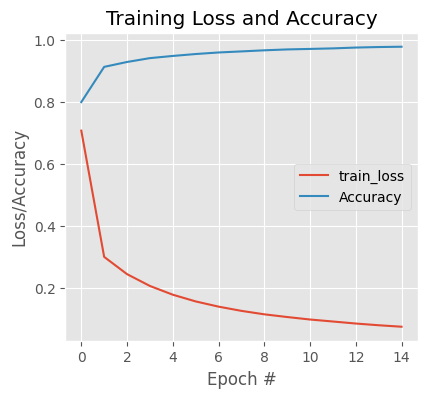

In [16]:
# Step 7: Plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(H.history['loss'], label="train_loss")
plt.plot(H.history['accuracy'], label="Accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
